# *k*-Means Clustering

Here we will try using a *k*-means clustering on the Old Faithful geyser data. 

In [5]:
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

We first download the CSV file then store the dta in a Numpy array.

In [6]:
data = pd.read_csv("C:/Users/Admin/Desktop/Kmeans/code/data/old_faithful_geyser_data.csv")
#data = np.array(data)
data.head(4)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


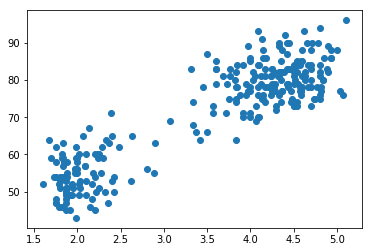

In [7]:
#plot the data

plt.scatter(data['eruptions'], data['waiting'], cmap='rainbow')
plt.show()


From the plot, we can see that the data can be divided into 2 main groups. Therefore, we will try using `k = 2` for our *k*-means model.

In [10]:
#fit the model, let the assumption cluster size be 4
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

After we model the data, we can get the centroid of each cluster as follows:

In [11]:
centroids = kmeans.cluster_centers_

print(centroids)

[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]


From our *k*-means model we just built, we can see the labels to which each data point is assigned.

In [12]:
labels = kmeans.predict(data)

print(labels)

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


Visulaize the data with center points

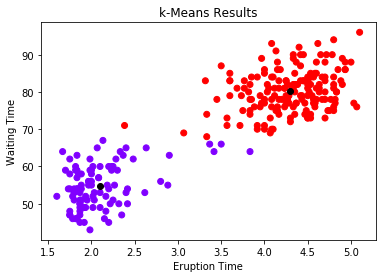

In [13]:

pyplot.title('k-Means Results')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')

plt.scatter(data['eruptions'], data['waiting'], c= kmeans.labels_.astype(float), cmap='rainbow')
## black colour denotes the center point
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', cmap='rainbow')

pyplot.show()

In [ ]:
# Elblow plot , to prove the cluster size

In [14]:
# scale and standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
# import library for kmeans
from sklearn.cluster import KMeans

In [16]:
# kmeans clustering  in an iteration 1 till 20 cluster size
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [17]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,544.000000
1,2,79.575959
2,3,56.313618
3,4,43.905380
4,5,34.293020
5,6,27.328472
6,7,23.839181
7,8,20.800050
8,9,18.575082
9,10,16.790678


In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

%matplotlib inline

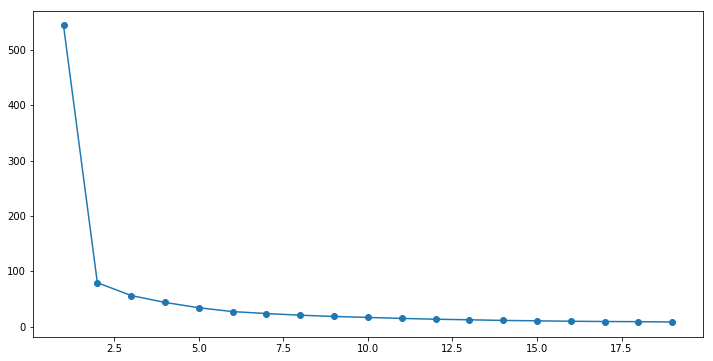

In [19]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# Inference, best cluster size is 2, as the variance beyond that dosent make much difference